<a href="https://colab.research.google.com/github/Hetav01/ML-EDAs/blob/main/Diabetes_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis and Predicting Diabetes from several medical predictors.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Datasets./diabetes.csv")

## **Cleaning and brainstroming the dataset.**

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#change the long column first for ease.
dataset = dataset.rename(columns= {"DiabetesPedigreeFunction": "DPF"})

Here each and every attributes except the "Outcome" is numerical in nature.

A huge revealing mistake in the dataset is that there are many 0 values for things which actually can't be 0.



*   Glucose
*   Blood Pressure
*   Skin Thickness
*   Insulin 
*   BMI

We can replace these values with NaN.

In [7]:
#for changing values inside the dataset, we need to make a copy of the dataset and
#replace the values.

dataset = dataset.copy(deep = True)
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
dataset.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

Now we fill these NaNs with some number appropriate to the dataset.

In [9]:
dataset["Glucose"].fillna(dataset["Glucose"].median(), inplace= True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].median(), inplace= True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].median(), inplace= True)
dataset["Insulin"].fillna(dataset["Insulin"].median(), inplace= True)
dataset["BMI"].fillna(dataset["BMI"].median(), inplace= True)

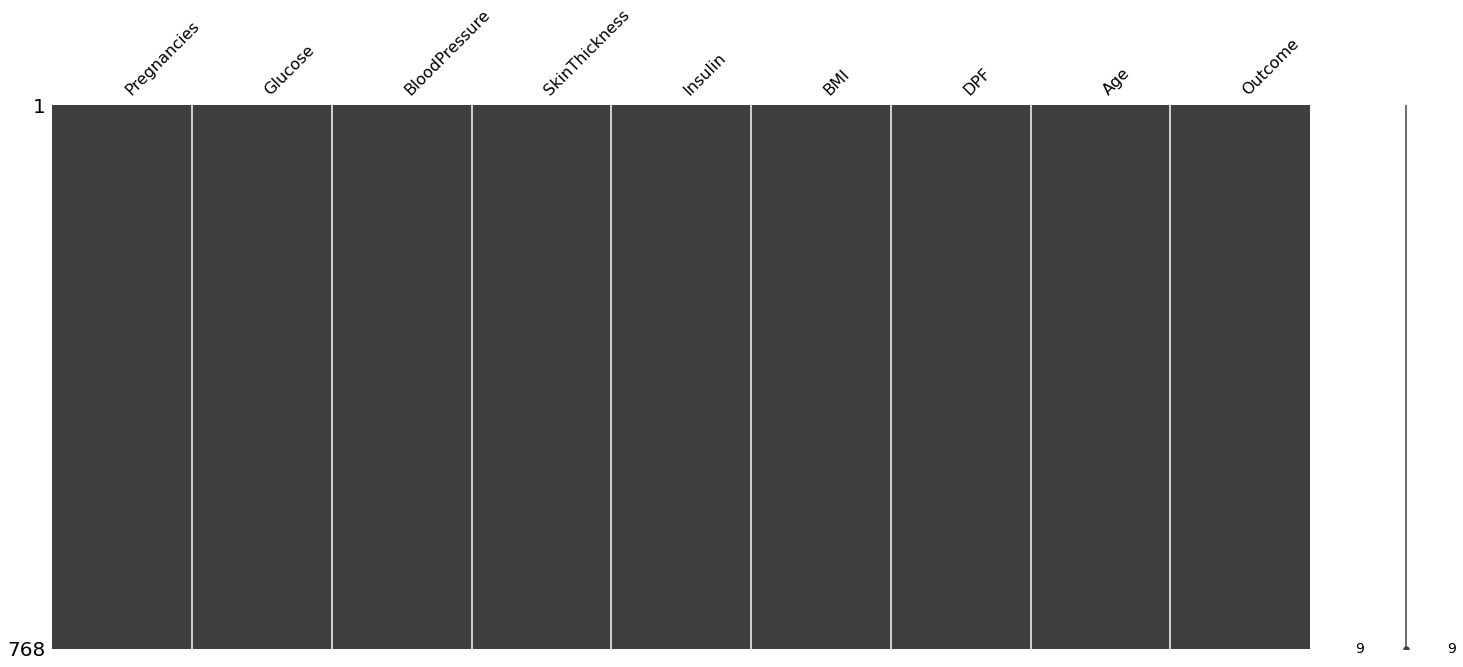

In [10]:
import missingno as msno
msno.matrix(dataset)

In [11]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

dataset.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Plotting the dataset.**

In [12]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


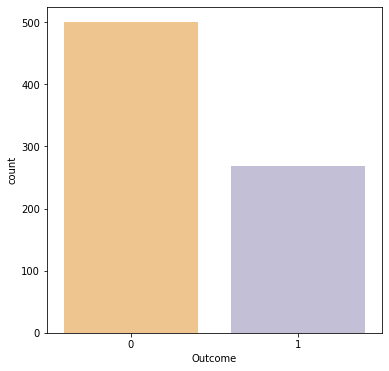

In [13]:
plt.figure(figsize= (6, 6))
sns.countplot(data= dataset, x= "Outcome", palette= "PuOr")

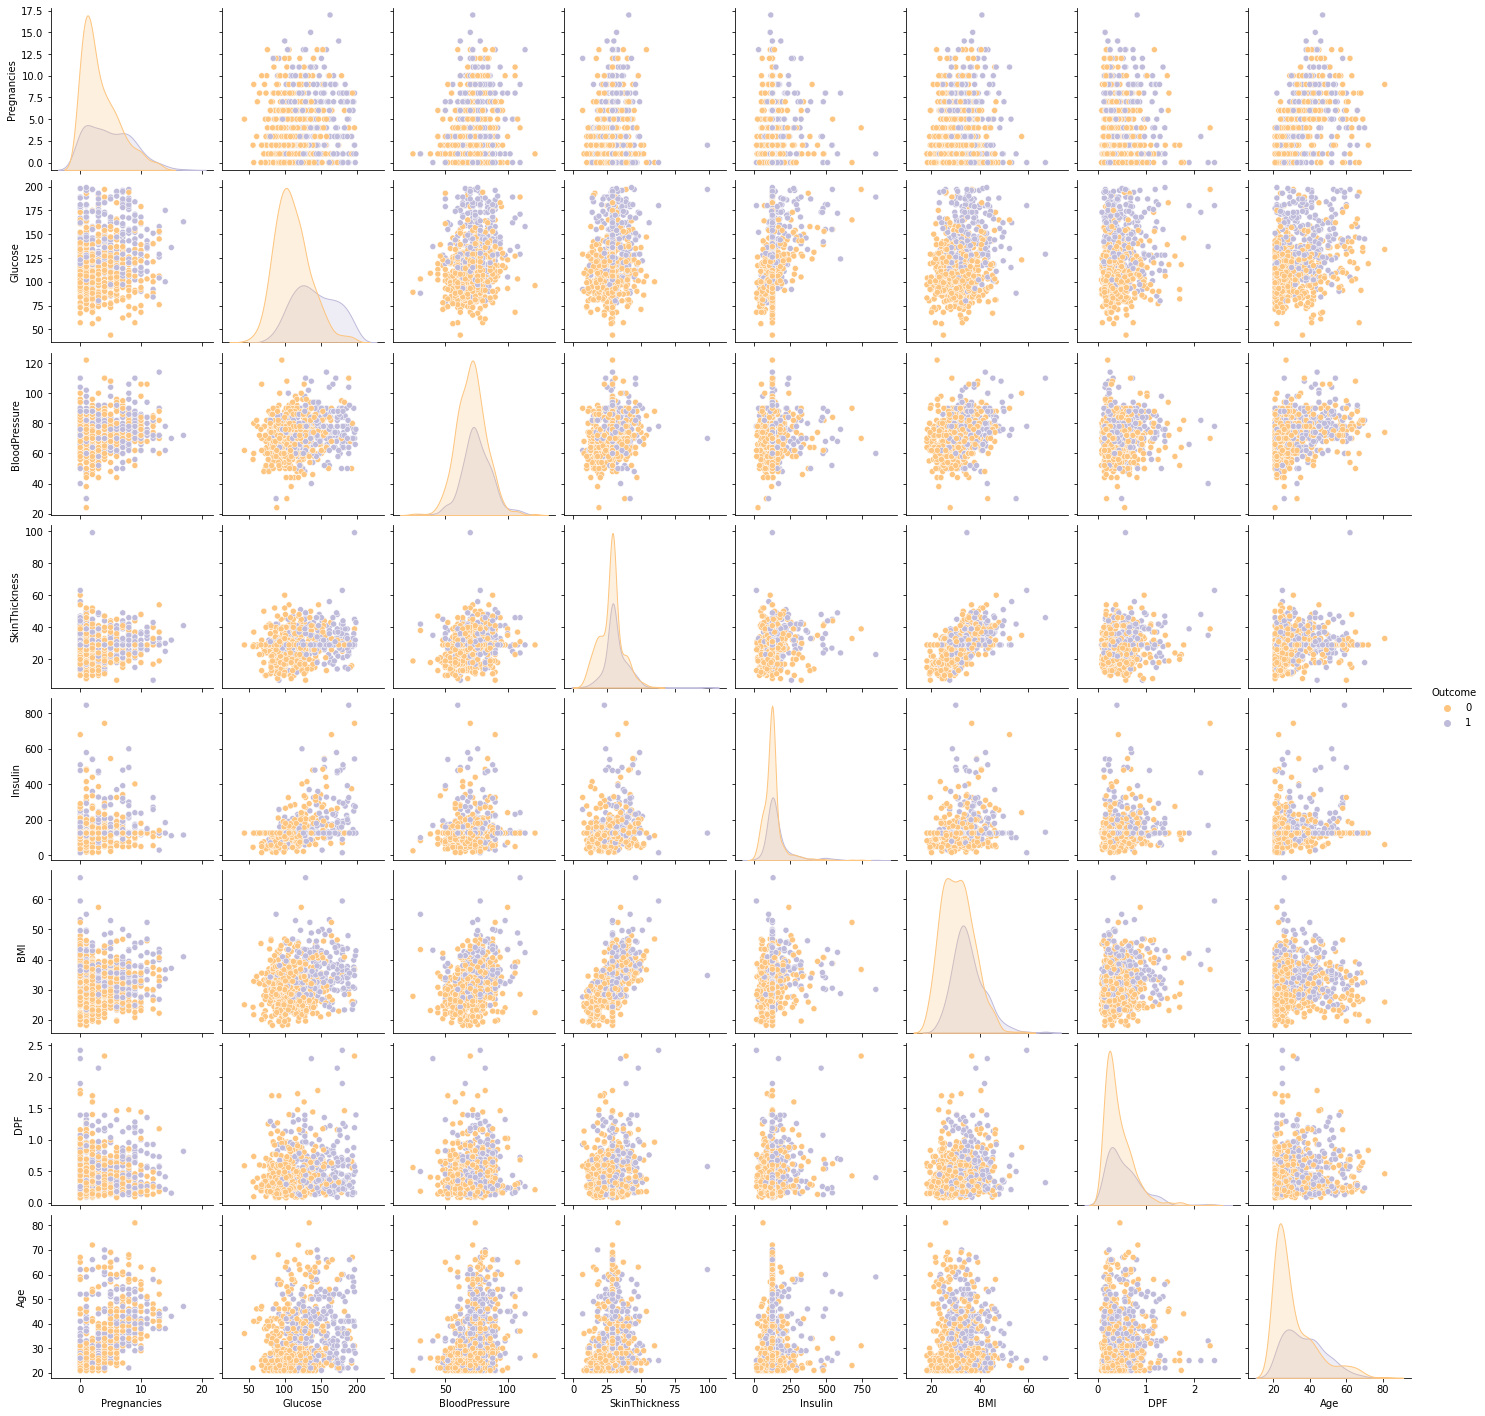

In [14]:
sns.pairplot(data= dataset, hue= "Outcome", palette= "PuOr")

### **Heatmap of the correlation matrix.**

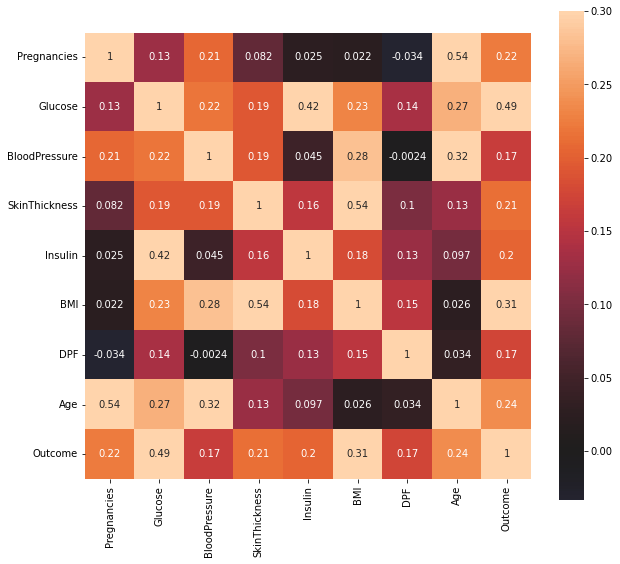

In [15]:
plt.subplots(figsize=(10, 9))
dCorr = dataset.corr()
sns.heatmap(data= dCorr, vmax=.3, center=0, square=True, annot= True)

In [16]:
attributeNames = [name for name in dataset.loc[:, :"Age"].columns]

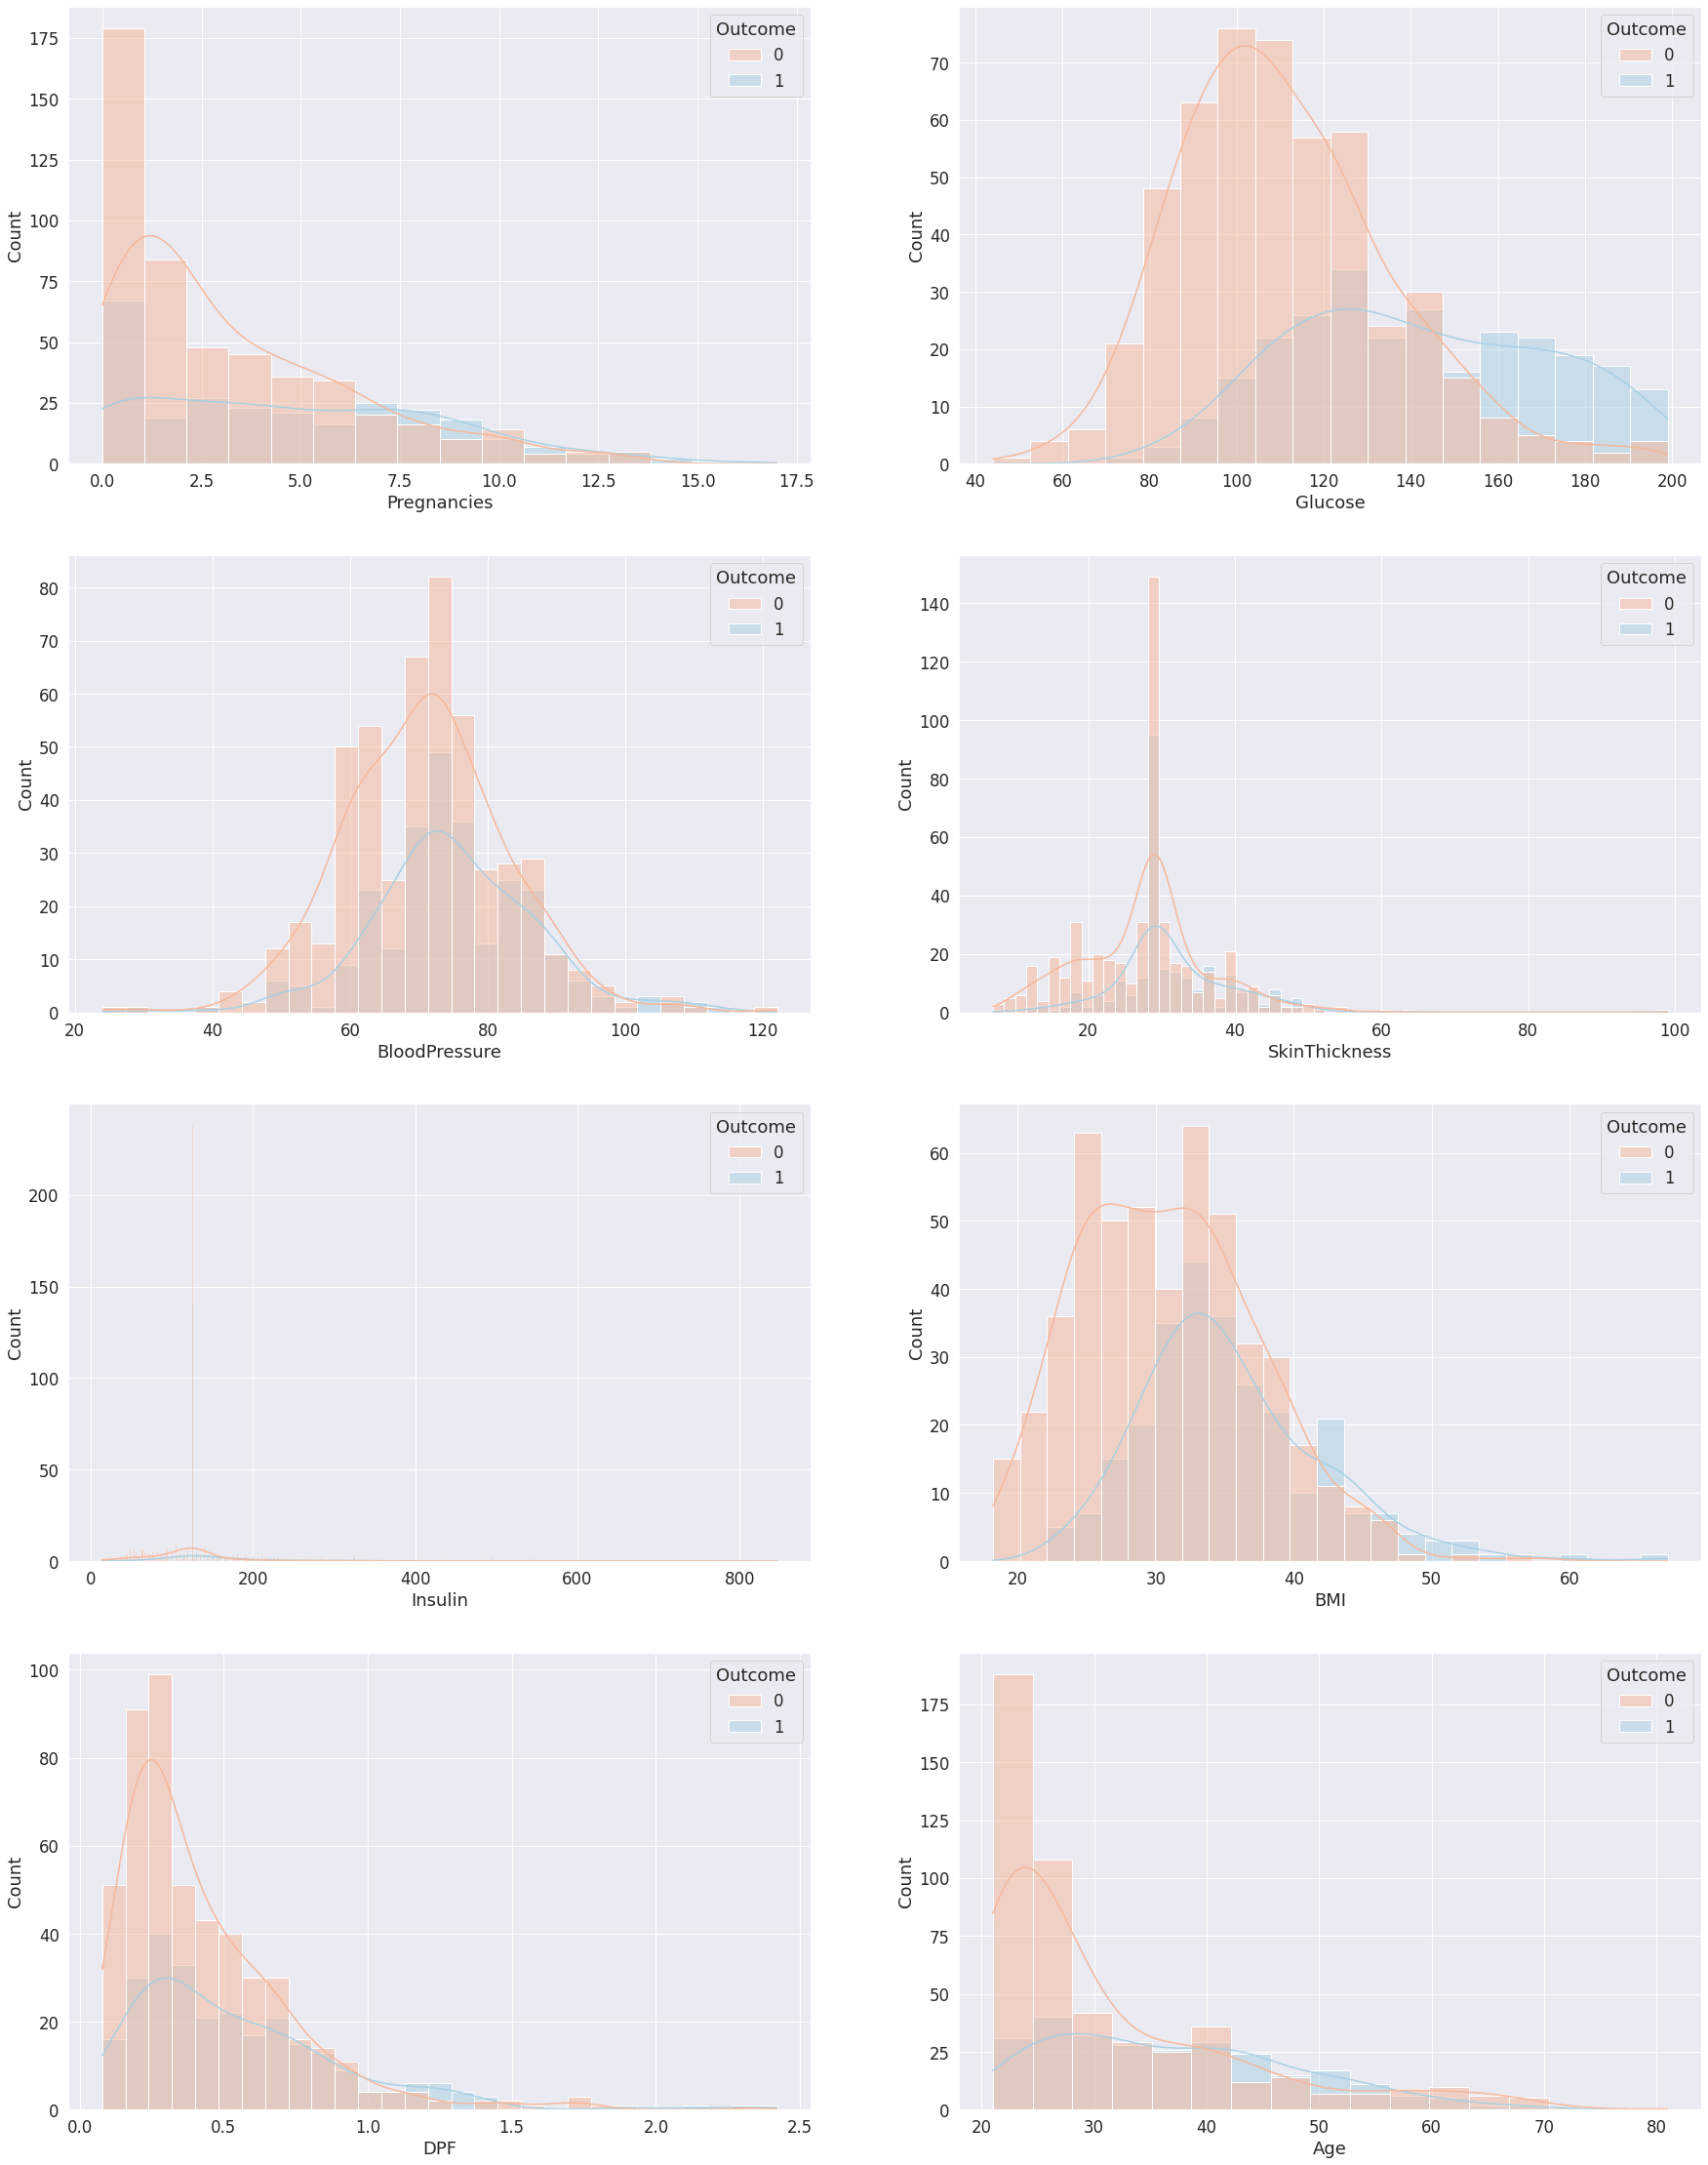

In [17]:
plt.figure(figsize= (30, 50))
i = 1
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
for name in attributeNames:
  plt.subplot(5, 2, i)
  sns.histplot(data= dataset, x= name, hue= "Outcome", kde= True, palette= "RdBu")
  i = i + 1

## **Bivariate Analysis**

We need to check how much impact does the **numerical**(continuous) features have on the **Outcome**.

### **Glucose and Outcome**

In [18]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
import random
from scipy import stats
testData = dataset[(np.abs(stats.zscore(dataset["Glucose"])) < 3)]

In [20]:
Outcome1 = testData[testData["Outcome"] == 1]["Glucose"]
Outcome0 = testData[testData["Outcome"] == 1]["Glucose"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-1.5017460605657167
0.1347792338264177
We failed to reject the null hypothesis.


Thus Glucose has a impact on determining the outcome of diabetes.

### **BloodPressure and Outcome**

In [21]:
import random
from scipy import stats
testData = dataset[(np.abs(stats.zscore(dataset["BloodPressure"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["BloodPressure"]
Outcome0 = testData[testData["Outcome"] == 1]["BloodPressure"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

1.0457648385069291
0.29697648620694816
We failed to reject the null hypothesis.


### **Pregnancies and Outcome**

In [22]:
import random
from scipy import stats
testData = dataset[(np.abs(stats.zscore(dataset["Pregnancies"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["Pregnancies"]
Outcome0 = testData[testData["Outcome"] == 1]["Pregnancies"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-0.4438910116231834
0.6576061284445123
We failed to reject the null hypothesis.


## **Scaling the Data.**

In [23]:
#cut the data in dependent and independent variables.
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [24]:
#we will use standardisation for this dataset.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)
#stratify makes sure that the split of the categorical variables remains the same.

## **Modelling the Data**

### **Logistic Regression**

Since the value to be predicted is binary, we can use the Logistic Regression algo on it.

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### **KNN.**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

trainScore = []
testScore = []

for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)

  trainScore.append(knn.score(X_train, y_train))
  testScore.append(knn.score(X_test, y_test))

print(testScore)

[0.7083333333333334, 0.7083333333333334, 0.7239583333333334, 0.7239583333333334, 0.7447916666666666, 0.71875, 0.7239583333333334, 0.7239583333333334, 0.7239583333333334, 0.71875, 0.734375, 0.7135416666666666, 0.7239583333333334, 0.71875, 0.7291666666666666, 0.734375, 0.7291666666666666, 0.7447916666666666, 0.7395833333333334, 0.75, 0.7395833333333334, 0.75, 0.7552083333333334, 0.75, 0.7604166666666666, 0.7552083333333334, 0.75, 0.7447916666666666, 0.7395833333333334]


In [28]:
maxTrainScore = max(trainScore)
print(maxTrainScore)

1.0


In [29]:
trainMaxPosi = []
for i in range(0, len(trainScore)):
  if trainScore[i] == maxTrainScore:
    trainMaxPosi.append(i)

print("maxTrainScore: {:.2f}% for i: {}".format(maxTrainScore*100, list(map(lambda x: x+1, trainMaxPosi))))

maxTrainScore: 100.00% for i: [1]


In [30]:
maxTestScore = max(testScore)
testMaxPosi = []
for i in range(0, len(testScore)):
  if testScore[i] == maxTestScore:
    testMaxPosi.append(i)

print("maxTestScore: {:.2f}% for i: {}".format(maxTestScore*100, list(map(lambda x: x+1, testMaxPosi))))

maxTestScore: 76.04% for i: [25]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


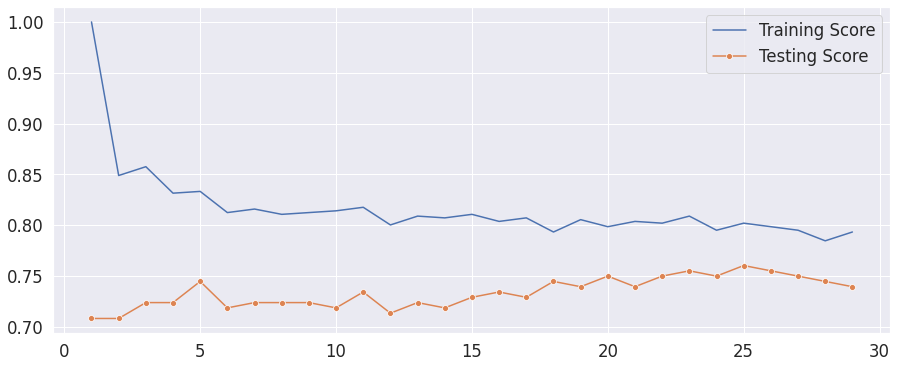

In [31]:
#plotting prediction scores for both training and testing set.
plt.figure(figsize= (15, 6))
sns.lineplot(range(1, 30), trainScore, label= "Training Score")
sns.lineplot(range(1, 30), testScore, marker= "o", label= "Testing Score")

For testing the best result was found on **i = 25**.

In [32]:
knn = KNeighborsClassifier(25)

knn.fit(X_train, y_train)
print("{:.2f}".format(knn.score(X_test, y_test)))

0.76


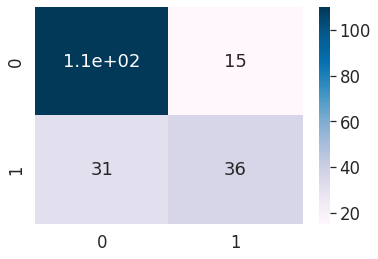

In [51]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(data= cm, annot= True, cmap= "PuBu")

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       125
           1       0.71      0.54      0.61        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192

